In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification 
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets

In [145]:
df = pd.read_csv('https://raw.githubusercontent.com/KristianFodor/EmotionRecognition/main/dataset_with_exp2.csv',header = 0)
#df = pd.read_csv('https://raw.githubusercontent.com/KristianFodor/EmotionRecognition/main/dataset.csv',header = 0)


In [146]:
df = df.drop_duplicates()

In [147]:
df.head()

,gsr,heart_rate,temperature,emotion,median gsr,median heart_rate,median temp,date_time,id_user,gender
0,230,88,27.0,Fearful,232.5,83,28.4,13/03/2023 15:50:10,25,F
1,235,88,26.9,Fearful,232.5,83,28.4,13/03/2023 15:50:09,25,F
2,232,88,27.3,Neutral,232.5,83,28.4,13/03/2023 15:50:06,25,F
3,234,89,26.7,Fearful,232.5,83,28.4,13/03/2023 15:50:01,25,F
4,240,87,26.8,Fearful,232.5,83,28.4,13/03/2023 15:49:58,25,F


In [148]:
df.describe()

,gsr,heart_rate,temperature,median gsr,median heart_rate,median temp,id_user
count,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000
mean,158.299373,93.196552,28.057806,155.673824,93.187461,28.234483,11.911599
std,111.789642,10.849837,2.164057,110.550977,10.280114,1.797012,7.006136
min,0.000000,72.000000,17.300000,9.500000,80.000000,22.700000,1.000000
25%,78.000000,83.000000,27.500000,80.000000,84.000000,27.700000,6.000000
50%,138.500000,91.000000,28.200000,104.000000,91.000000,28.200000,12.000000
75%,220.000000,101.000000,29.000000,221.000000,103.000000,28.900000,18.000000
max,510.000000,122.000000,32.000000,483.000000,119.000000,31.200000,25.000000


In [149]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

#df = remove_outliers(df,df[["gsr","heart_rate","temperature"]],2)

In [150]:
#df = df.drop_duplicates()
#df = remove_outliers(df,df[["gsr","heart_rate","temperature"]],2)

In [151]:
from google.colab import files

<ipython-input-163-f168eace1937>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 25)
<ipython-input-163-f168eace1937>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(p.get_xticks(), size = 25)


[Text(-100.0, 0, '-100.0'),
 Text(0.0, 0, '0.0'),
 Text(100.0, 0, '100.0'),
 Text(200.0, 0, '200.0'),
 Text(300.0, 0, '300.0'),
 Text(400.0, 0, '400.0'),
 Text(500.0, 0, '500.0'),
 Text(600.0, 0, '600.0')]

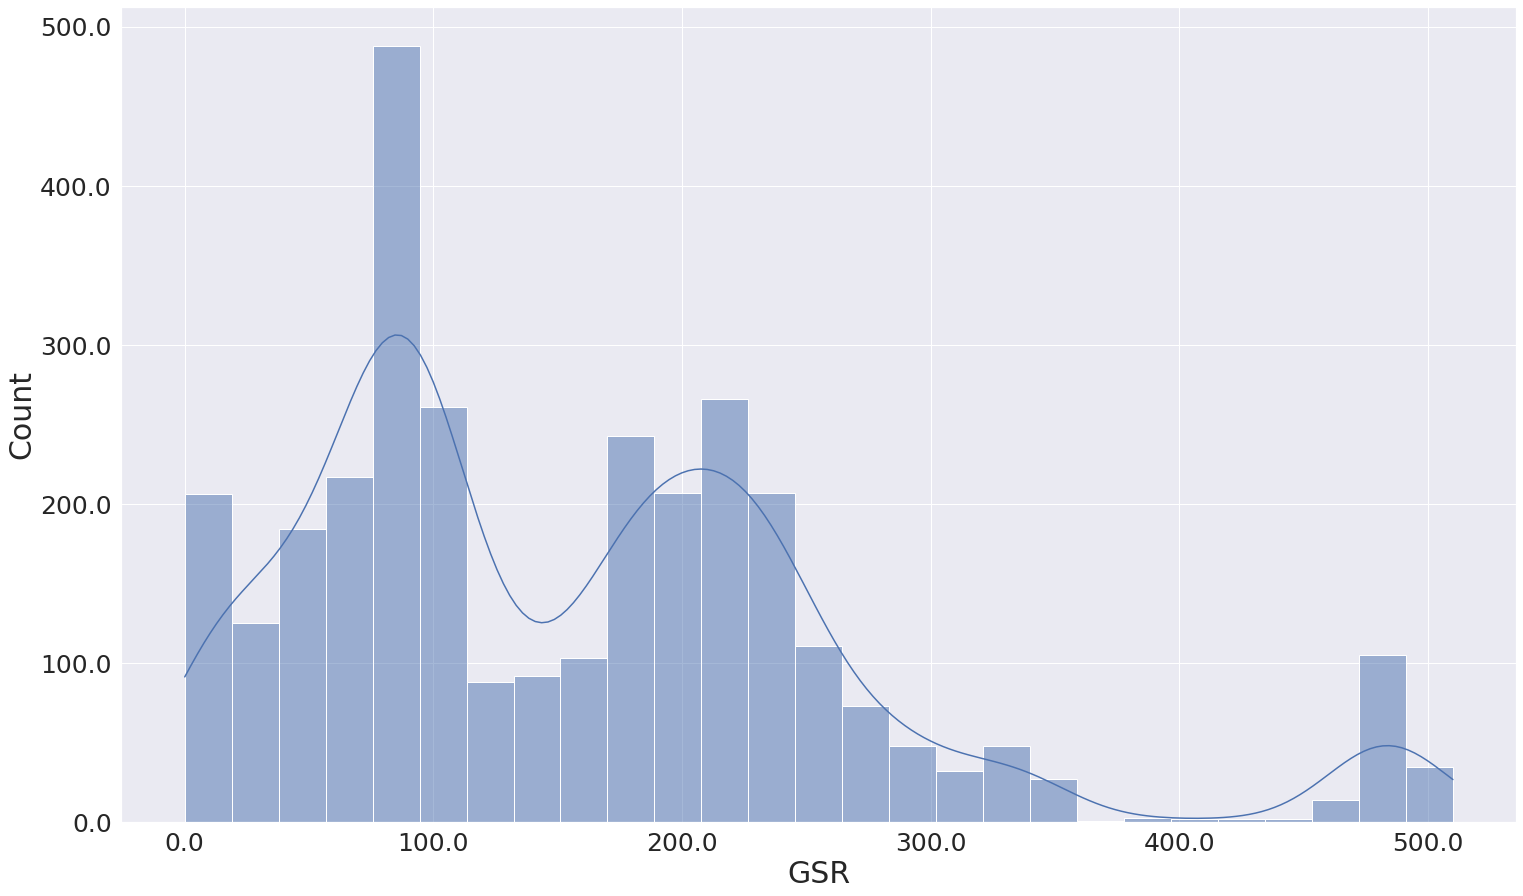

In [163]:
sns.set(rc = {'figure.figsize':(25,15)})
p = sns.histplot(x="gsr", data=df, kde=True)
p.set_xlabel("GSR", fontsize = 30)
p.set_ylabel("Count", fontsize = 30)
p.set_yticklabels(p.get_yticks(), size = 25)
p.set_xticklabels(p.get_xticks(), size = 25)

<ipython-input-164-7eb073a6fc9f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 25)
<ipython-input-164-7eb073a6fc9f>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(p.get_xticks(), size = 25)


[Text(60.0, 0, '60.0'),
 Text(70.0, 0, '70.0'),
 Text(80.0, 0, '80.0'),
 Text(90.0, 0, '90.0'),
 Text(100.0, 0, '100.0'),
 Text(110.0, 0, '110.0'),
 Text(120.0, 0, '120.0'),
 Text(130.0, 0, '130.0')]

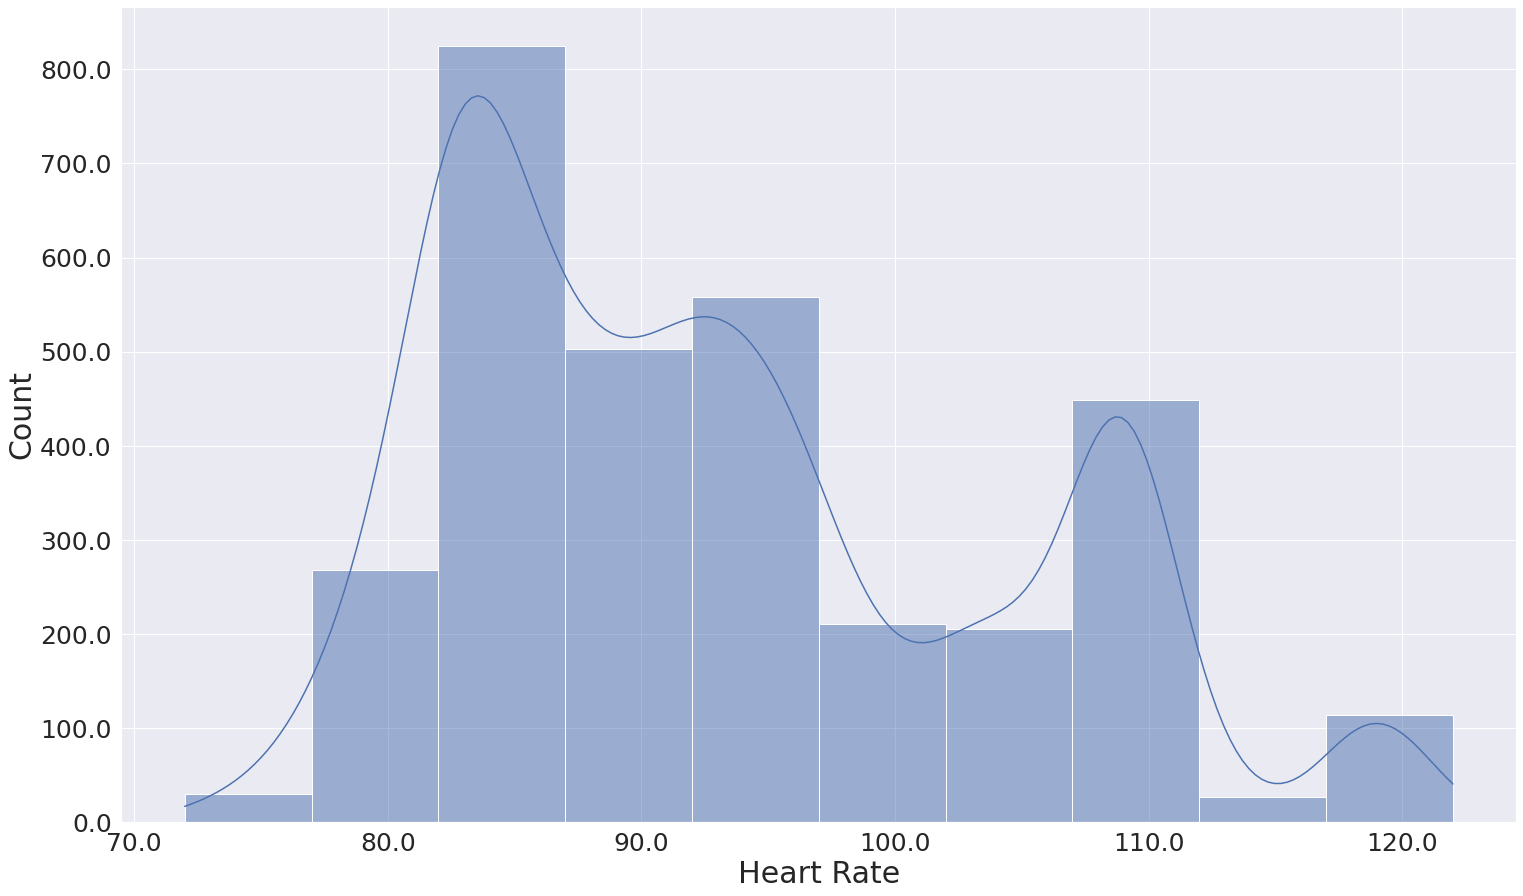

In [164]:
p = sns.histplot(x="heart_rate", data=df, kde=True, bins = 10)
p.set_xlabel("Heart Rate", fontsize = 30)
p.set_ylabel("Count", fontsize = 30)
p.set_yticklabels(p.get_yticks(), size = 25)
p.set_xticklabels(p.get_xticks(), size = 25)

<ipython-input-165-084394e94c57>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 25)
<ipython-input-165-084394e94c57>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(p.get_xticks(), size = 25)


[Text(16.0, 0, '16.0'),
 Text(18.0, 0, '18.0'),
 Text(20.0, 0, '20.0'),
 Text(22.0, 0, '22.0'),
 Text(24.0, 0, '24.0'),
 Text(26.0, 0, '26.0'),
 Text(28.0, 0, '28.0'),
 Text(30.0, 0, '30.0'),
 Text(32.0, 0, '32.0'),
 Text(34.0, 0, '34.0')]

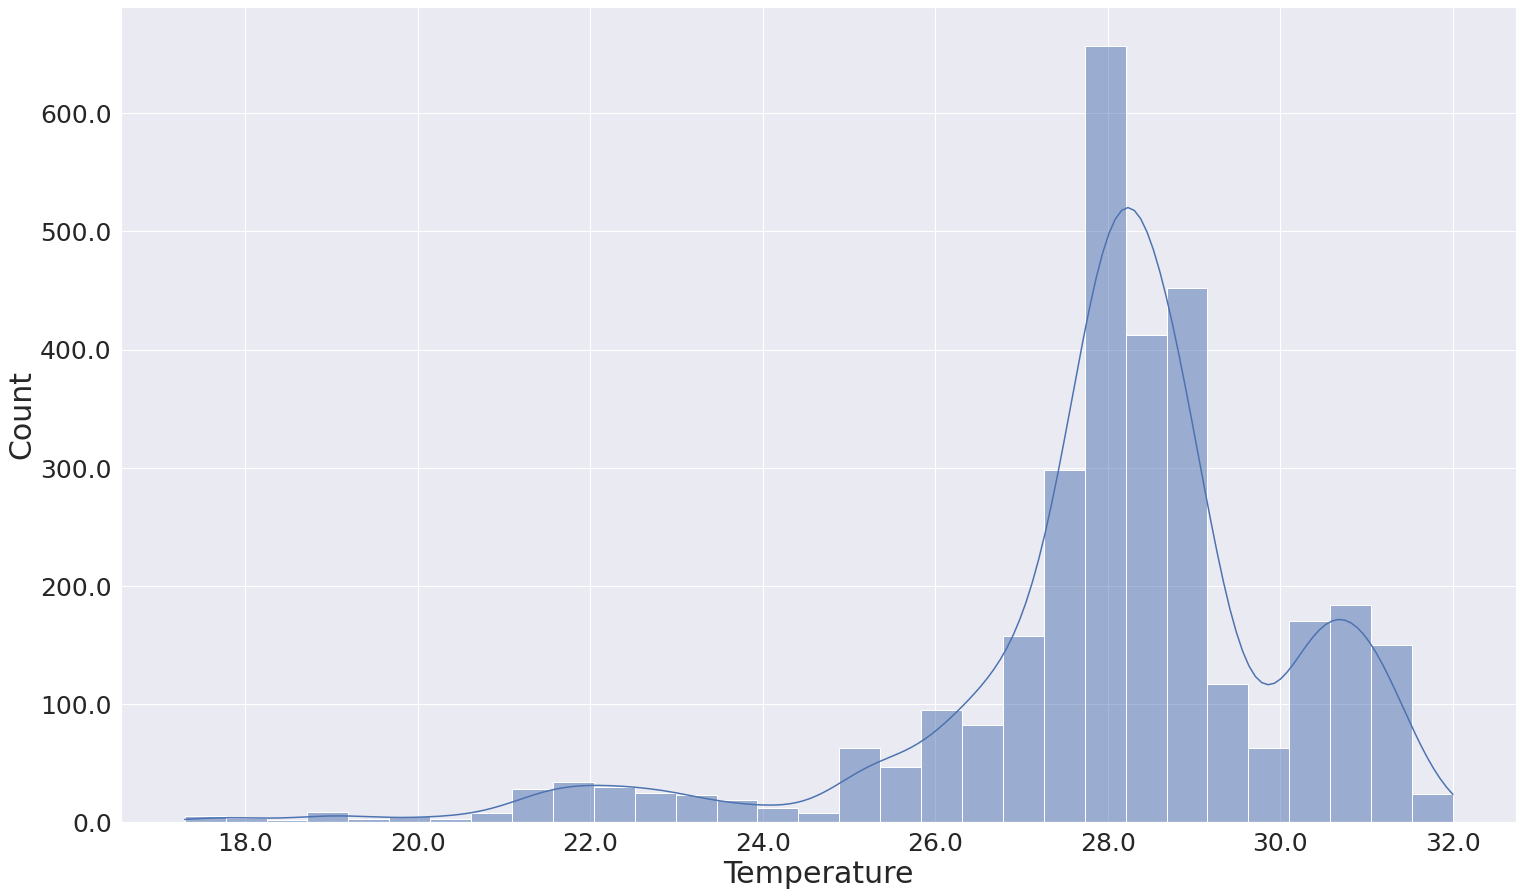

In [165]:
p = sns.histplot(x="temperature", data=df, kde=True, bins = 31)
p.set_xlabel("Temperature", fontsize = 30)
p.set_ylabel("Count", fontsize = 30)
p.set_yticklabels(p.get_yticks(), size = 25)
p.set_xticklabels(p.get_xticks(), size = 25)

In [168]:
df.head()

,gsr,heart_rate,temperature,emotion,median gsr,median heart_rate,median temp,date_time,id_user,gender
0,230,88,27.0,Fearful,232.5,83,28.4,13/03/2023 15:50:10,25,F
1,235,88,26.9,Fearful,232.5,83,28.4,13/03/2023 15:50:09,25,F
2,232,88,27.3,Neutral,232.5,83,28.4,13/03/2023 15:50:06,25,F
3,234,89,26.7,Fearful,232.5,83,28.4,13/03/2023 15:50:01,25,F
4,240,87,26.8,Fearful,232.5,83,28.4,13/03/2023 15:49:58,25,F


In [169]:
df.median()

<ipython-input-169-6d467abf240d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


gsr                  138.5
heart_rate            91.0
temperature           28.2
median gsr           104.0
median heart_rate     91.0
median temp           28.2
id_user               12.0
dtype: float64

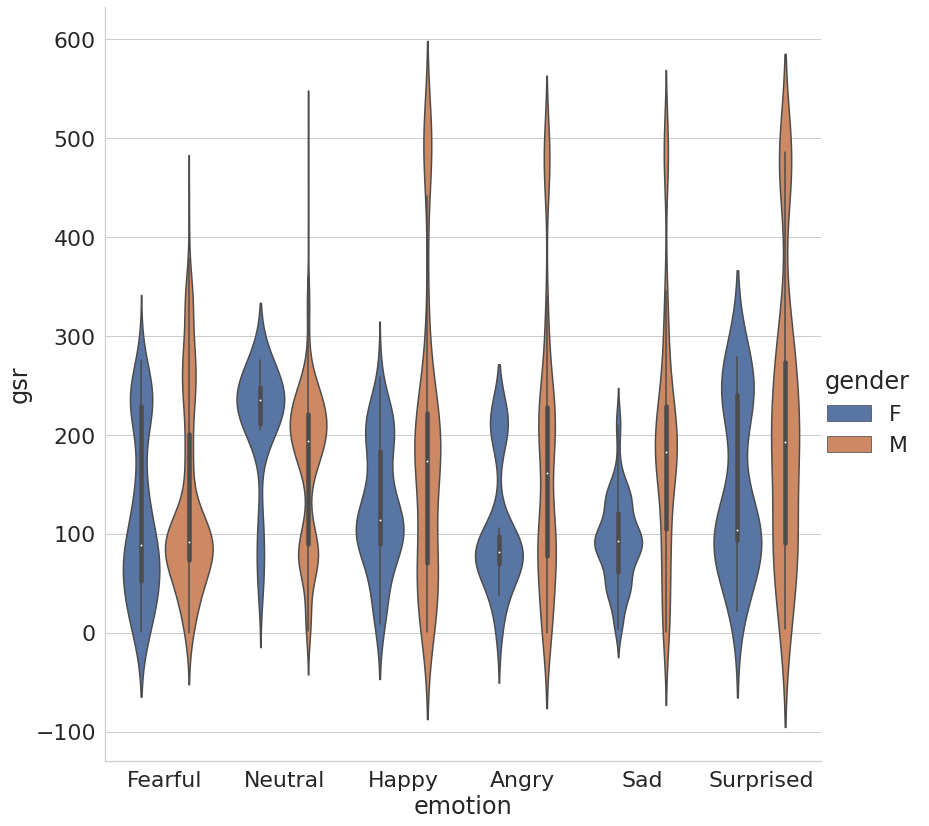

In [179]:
sns.set_theme(style = "whitegrid", font_scale= 2)
ax = sns.catplot(kind="violin", x="emotion", y="gsr", data=df, height=12, order=['Fearful','Neutral','Happy','Angry','Sad','Surprised'], hue="gender")


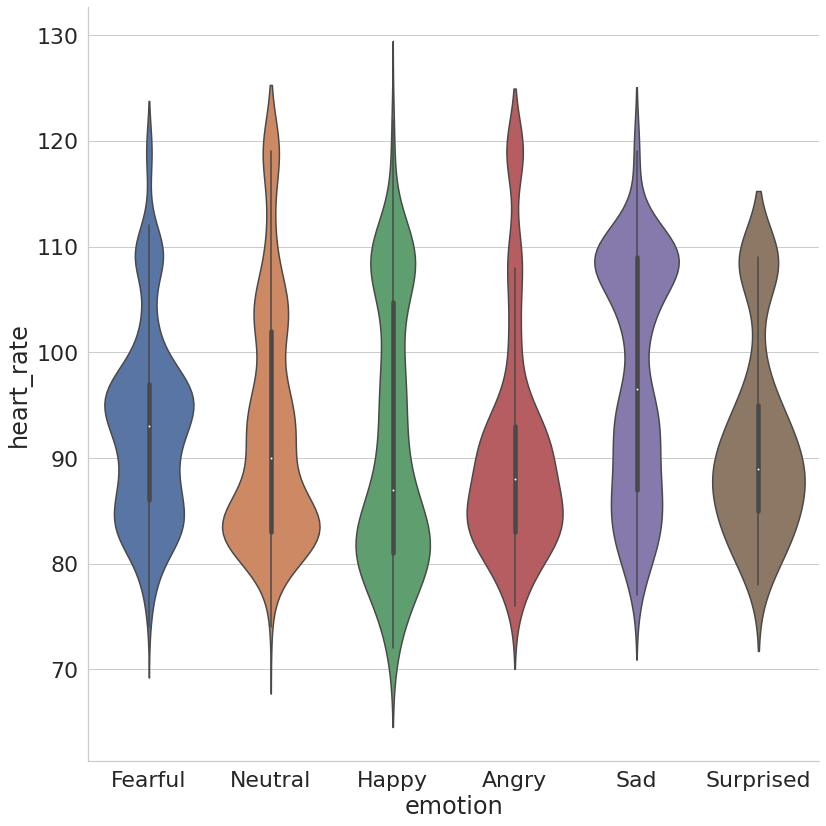

In [177]:
ax = sns.catplot(kind="violin", x="emotion", y="heart_rate", data=df, height=12, order=['Fearful','Neutral','Happy','Angry','Sad','Surprised'])

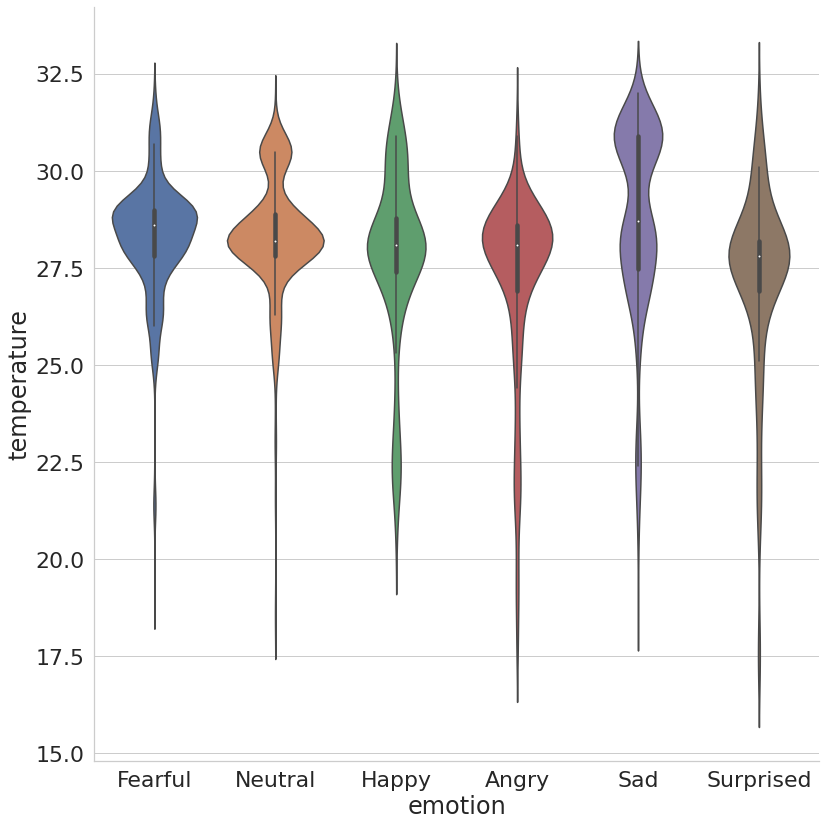

In [178]:
ax = sns.catplot(kind="violin", x="emotion", y="temperature", data=df, height=12, order=['Fearful','Neutral','Happy','Angry','Sad','Surprised'])

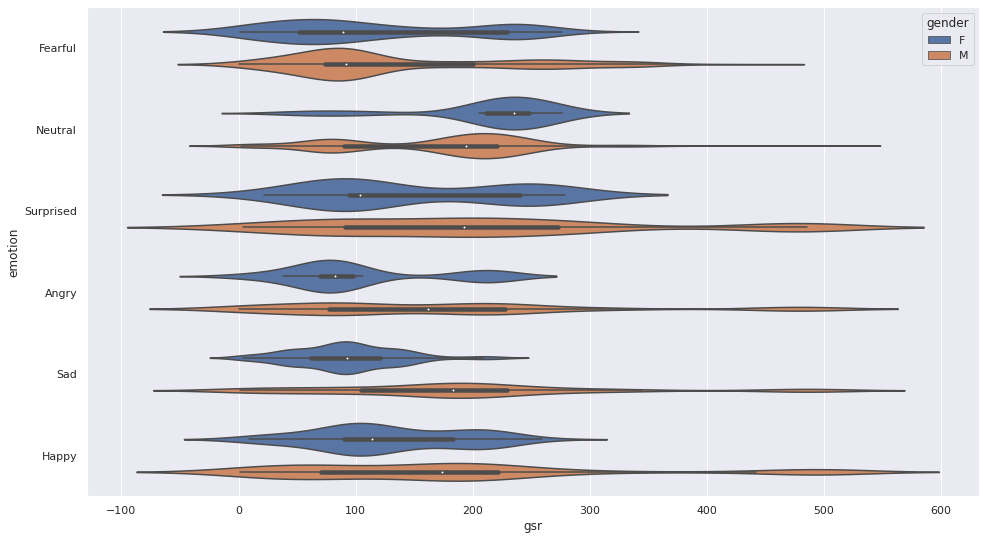

In [102]:
sns.set(rc = {'figure.figsize':(16,9)})
ax = sns.violinplot(y="emotion", x="gsr", data=df, hue="gender")

<Axes: xlabel='emotion', ylabel='temperature'>

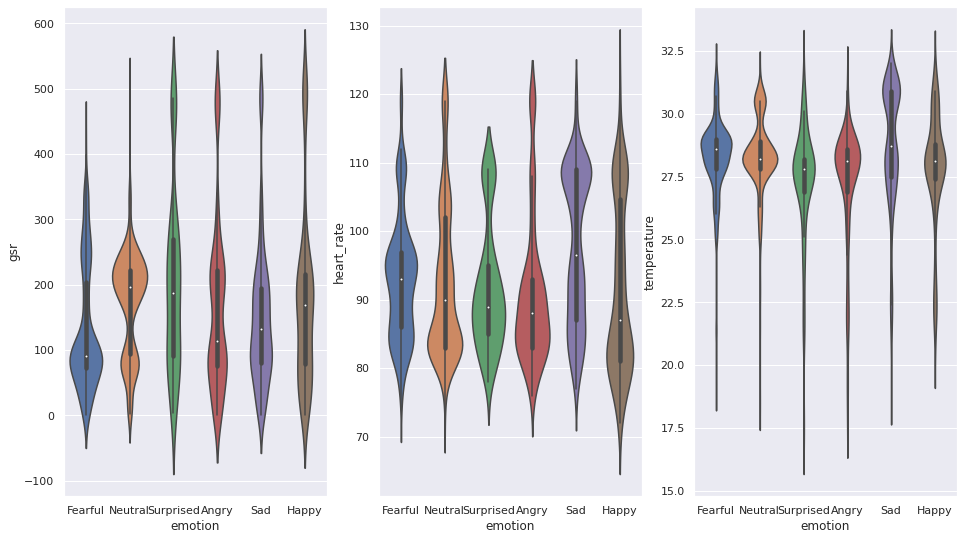

In [103]:
fig, ax = plt.subplots(1,3)
sns.set(rc = {'figure.figsize':(50,15)})
sns.violinplot(ax=ax[0], x="emotion", y="gsr", data=df)

sns.violinplot(ax=ax[1], x="emotion", y="heart_rate", data=df)

sns.violinplot(ax=ax[2], x="emotion", y="temperature", data=df)

array([<Axes: ylabel='gsr'>, <Axes: ylabel='heart_rate'>,
       <Axes: ylabel='temperature'>, <Axes: ylabel='median gsr'>,
       <Axes: ylabel='median heart_rate'>, <Axes: ylabel='median temp'>,
       <Axes: ylabel='date_time'>, <Axes: ylabel='id_user'>,
       <Axes: ylabel='gender'>], dtype=object)

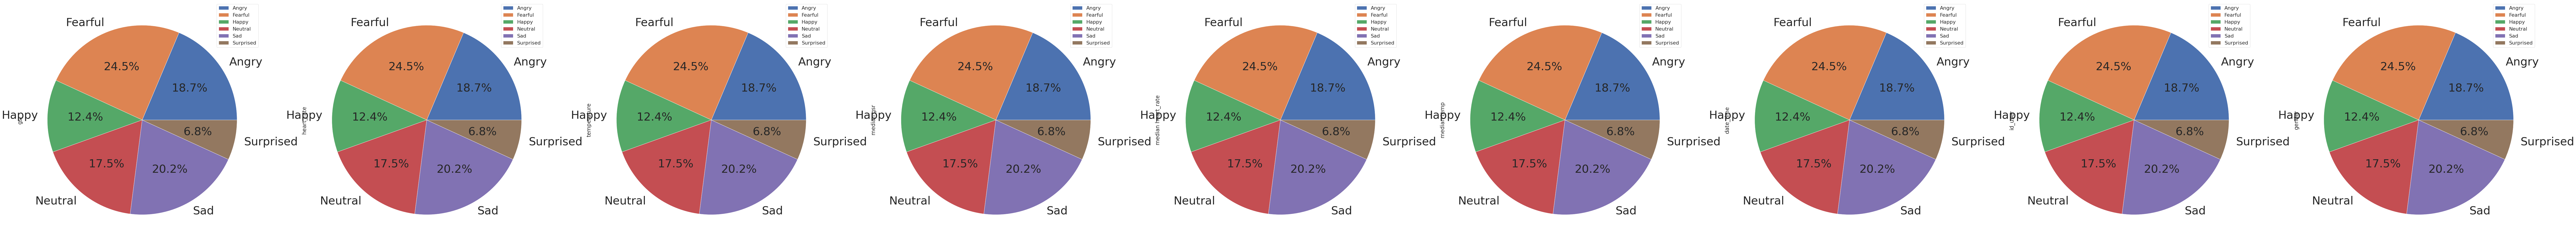

In [171]:

df.groupby("emotion").count().plot.pie(subplots=True, figsize=(200,60),autopct='%1.1f%%', legend = True,  textprops={'fontsize': 50})

In [113]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [114]:
def oversample(df):
    classes = df.emotion.value_counts().to_dict()
    most = max(classes.values())
    classes_list = []
    for key in classes:
        classes_list.append(df[df['emotion'] == key]) 
    classes_sample = []
    for i in range(1,len(classes_list)):
        classes_sample.append(classes_list[i].sample(most, replace=True))
    df_maybe = pd.concat(classes_sample)
    final_df = pd.concat([df_maybe,classes_list[0]], axis=0)
    final_df = final_df.reset_index(drop=True)
    return final_df

In [115]:
final = oversample(df)

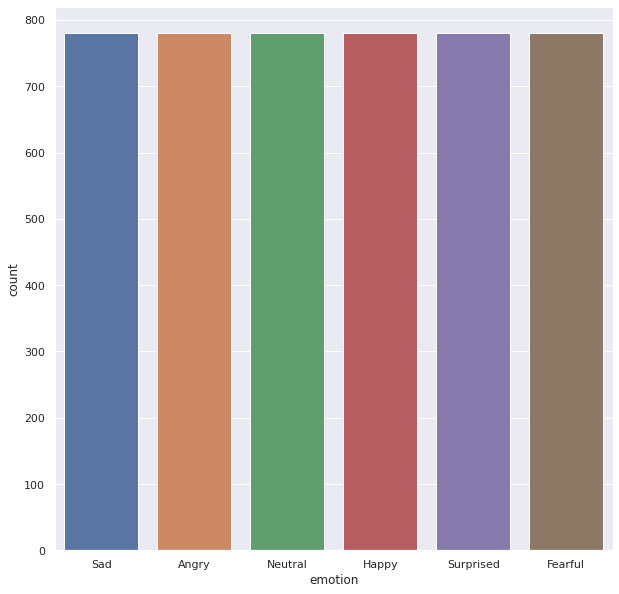

In [116]:
ax = sns.countplot(x="emotion", data=final)

In [180]:
final.describe()

,gsr,heart_rate,temperature,median gsr,median heart_rate,median temp,id_user
count,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000
mean,166.424029,92.693342,27.889970,162.549509,92.701451,28.076440,12.685019
std,118.517805,10.801363,2.273891,118.843897,10.341236,1.902983,7.158893
min,0.000000,72.000000,17.300000,9.500000,80.000000,22.700000,1.000000
25%,80.250000,83.000000,27.500000,80.000000,84.000000,27.700000,6.000000
50%,160.000000,90.000000,28.200000,160.000000,91.000000,28.200000,13.000000
75%,224.000000,100.000000,28.900000,221.000000,96.000000,28.900000,19.000000
max,510.000000,122.000000,32.000000,483.000000,119.000000,31.200000,25.000000


In [181]:
import random

np.random.seed(42)

In [182]:
data = pd.read_csv('https://raw.githubusercontent.com/KristianFodor/EmotionRecognition/main/exp2_oversampled.csv')

In [183]:
#data = data.drop_duplicates()

In [184]:
data.describe()

,Unnamed: 0,gsr,heart_rate,temperature,median gsr,median heart_rate,median temp,id_user
count,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000
mean,2288.500000,147.549148,92.862822,28.284819,143.933595,92.967453,28.480974,12.740061
std,1321.699096,82.413230,9.899449,1.848030,83.185806,9.336243,1.330156,7.483675
min,0.000000,0.000000,73.000000,17.300000,25.000000,80.000000,26.000000,1.000000
25%,1144.250000,84.000000,84.000000,27.700000,80.000000,86.000000,27.700000,5.000000
50%,2288.500000,146.000000,91.000000,28.200000,104.000000,91.000000,28.300000,13.000000
75%,3432.750000,212.000000,101.000000,29.000000,221.000000,103.000000,28.900000,19.000000
max,4577.000000,360.000000,114.000000,32.000000,334.000000,109.000000,31.200000,25.000000


In [185]:
oldy = data['emotion']
print(oldy)

0           Sad
1           Sad
2           Sad
3           Sad
4           Sad
         ...   
4573    Fearful
4574    Fearful
4575    Fearful
4576    Fearful
4577    Fearful
Name: emotion, Length: 4578, dtype: object


In [186]:
oldX = data[['gsr', 'heart_rate', 'temperature', 'median gsr', 'median heart_rate', 'median temp']]
oldX2 = data[['gsr', 'heart_rate', 'temperature']]
oldX3 = data[['median gsr', 'median heart_rate', 'median temp']]
print(oldX2)

      gsr  heart_rate  temperature
0     197         103         30.6
1     113         109         30.9
2      91         110         28.7
3     219          84         27.6
4     194         106         30.7
...   ...         ...          ...
4573   52          90         31.2
4574   30          89         30.2
4575   25          96         30.9
4576    7          96         30.8
4577   22          96         29.9

[4578 rows x 3 columns]


In [187]:
data['emotion'].replace(['Fearful', 'Neutral', 'Sad',
                         'Angry', 'Happy', 'Surprised'],
                        [1, 2, 3, 4, 5, 6], inplace=True)

data['gender'].replace(['M', 'F'],
                        [0,1], inplace=True)

In [188]:
from sklearn.utils import shuffle
df = shuffle(data).reset_index(drop=True)

In [189]:
mydf = df[['gsr', 'heart_rate', 'temperature']]
corr = mydf.corr(method="pearson")
corr.style.background_gradient(cmap='coolwarm')

,gsr,heart_rate,temperature
gsr,1.000000,-0.458275,-0.280421
heart_rate,-0.458275,1.000000,0.414395
temperature,-0.280421,0.414395,1.000000


In [190]:
corr = df.corr(method="pearson")
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,gsr,heart_rate,temperature,emotion,median gsr,median heart_rate,median temp,id_user,gender
Unnamed: 0,1.000000,-0.057906,-0.096458,-0.130340,0.084515,-0.088530,-0.128547,-0.192229,0.093898,-0.188586
gsr,-0.057906,1.000000,-0.458275,-0.280421,0.008894,0.951742,-0.521374,-0.341968,0.403214,-0.162893
heart_rate,-0.096458,-0.458275,1.000000,0.414395,-0.010402,-0.471832,0.929828,0.638232,-0.426530,0.199251
temperature,-0.130340,-0.280421,0.414395,1.000000,-0.106572,-0.271922,0.473271,0.699421,-0.533786,0.283078
emotion,0.084515,0.008894,-0.010402,-0.106572,1.000000,-0.028060,0.031793,-0.119713,0.285655,-0.010804
median gsr,-0.088530,0.951742,-0.471832,-0.271922,-0.028060,1.000000,-0.531330,-0.336008,0.398442,-0.183243
median heart_rate,-0.128547,-0.521374,0.929828,0.473271,0.031793,-0.531330,1.000000,0.666069,-0.445729,0.204094
median temp,-0.192229,-0.341968,0.638232,0.699421,-0.119713,-0.336008,0.666069,1.000000,-0.649132,0.332928
id_user,0.093898,0.403214,-0.426530,-0.533786,0.285655,0.398442,-0.445729,-0.649132,1.000000,-0.065757
gender,-0.188586,-0.162893,0.199251,0.283078,-0.010804,-0.183243,0.204094,0.332928,-0.065757,1.000000


In [191]:
X = data[['gsr', 'heart_rate', 'temperature', 'median gsr', 'median heart_rate', 'median temp']]
nomeanX = data[['gsr', 'heart_rate', 'temperature']]
y = data['emotion']

In [192]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [193]:
pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [194]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import SGDClassifier
from sklearn import tree
#from dtreeviz.trees import dtreeviz 
from google.colab import files
import graphviz
from sklearn.tree import _tree

In [195]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(X,y)

10

In [196]:
def myclassifiers(X,y):
    boxplot=pd.DataFrame(columns=['classa', 'value'])
    classifiers = [KNeighborsClassifier(n_neighbors=5), GaussianNB(), LinearDiscriminantAnalysis(solver='lsqr'), 
                   MLPClassifier(), SVC(), GradientBoostingClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

    i = 0
    
    for classifier in classifiers:
        name = str(classifier)
        x=0
        results = pd.DataFrame(columns=[name+'accuracy', name+'prec_1', name+'prec_2', name+'prec_3', name+'prec_4', name+'prec_5', name+'prec_6', name+'rec_1', name+'rec_2', name+'rec_3', name+'rec_4', name+'rec_5', name+'rec_6', name+'f1-sc_1',name+'f1-sc_2',name+'f1-sc_3',name+'f1-sc_4', name+'f1-sc_5', name+'f1-sc_6' ])
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            result = classifier.fit(X_train, y_train)
            prediction = classifier.predict(X_test)

            p, r, f, s = precision_recall_fscore_support(y_test, prediction)
            cm = multilabel_confusion_matrix(y_test, prediction)


            results.loc[x]=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
            results.loc[x] = [metrics.accuracy_score(y_test, prediction),p[0], p[1], p[2], p[3], p[4], p[5], r[0], r[1], r[2], r[3], r[4], r[5], f[0], f[1], f[2], f[3], f[4], f[5]]
            boxplot.loc[i] = [name, metrics.f1_score(y_test, prediction, average="micro")]
            x=x+1
            i=i+1
        display(results)
    return boxplot

In [197]:
def graf(box):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.pylab as pylab
    
    from matplotlib import rcParams

    # figure size in inches
    rcParams['axes.labelsize'] = 20
    rcParams['figure.figsize'] = 20,25
    
    fig, axes = plt.subplots(4, 2)
    
    sns.boxplot(  x=box[box['classa']=='KNeighborsClassifier()'].classa, y=box[box['classa']=='KNeighborsClassifier()'].value*100,  orient='v' , ax=axes[0,0])
    sns.boxplot(  x=box[box['classa']=='GaussianNB()'].classa, y=box[box['classa']=='GaussianNB()'].value*100, orient='v' , ax=axes[0,1])
    sns.boxplot(  x=box[box['classa']=='LinearDiscriminantAnalysis(solver=\'lsqr\')'].classa, y=box[box['classa']=='LinearDiscriminantAnalysis(solver=\'lsqr\')'].value*100, orient='v' , ax=axes[1,0])
    sns.boxplot(  x=box[box['classa']=='MLPClassifier()'].classa, y=box[box['classa']=='MLPClassifier()'].value*100, orient='v' , ax=axes[1,1])
    sns.boxplot(  x=box[box['classa']=='SVC()'].classa, y=box[box['classa']=='SVC()'].value*100, orient='v' , ax=axes[2,0])
    sns.boxplot(  x=box[box['classa']=='GradientBoostingClassifier()'].classa, y=box[box['classa']=='GradientBoostingClassifier()'].value*100, orient='v' , ax=axes[2,1])
    sns.boxplot(  x=box[box['classa']=='DecisionTreeClassifier()'].classa, y=box[box['classa']=='DecisionTreeClassifier()'].value*100, orient='v' , ax=axes[3,0])
    sns.boxplot(  x=box[box['classa']=='RandomForestClassifier()'].classa, y=box[box['classa']=='RandomForestClassifier()'].value*100, orient='v' , ax=axes[3,1])
    
    axes[0,0].set(xlabel="method", ylabel="F1 score")
    axes[0,1].set(xlabel="method", ylabel="F1 score")

    axes[1,0].set(xlabel="method", ylabel="F1 score")
    axes[1,1].set(xlabel="method", ylabel="F1 score")

    axes[2,0].set(xlabel="method", ylabel="F1 score")
    axes[2,1].set(xlabel="method", ylabel="F1 score")
    
    axes[3,0].set(xlabel="method", ylabel="F1 score")
    axes[3,1].set(xlabel="method", ylabel="F1 score")

    
    plt.show()

In [198]:
def violin(box):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.pylab as pylab
    
    from matplotlib import rcParams

    # figure size in inches
    rcParams['axes.labelsize'] = 20
    rcParams['figure.figsize'] = 20,25
    
    fig, axes = plt.subplots(4, 2)
    
    sns.violinplot(  x=box[box['classa']=='KNeighborsClassifier()'].classa, y=box[box['classa']=='KNeighborsClassifier()'].value*100,  orient='v' , ax=axes[0,0])
    sns.violinplot(  x=box[box['classa']=='GaussianNB()'].classa, y=box[box['classa']=='GaussianNB()'].value*100, orient='v' , ax=axes[0,1])
    sns.violinplot(  x=box[box['classa']=='LinearDiscriminantAnalysis(solver=\'lsqr\')'].classa, y=box[box['classa']=='LinearDiscriminantAnalysis(solver=\'lsqr\')'].value*100, orient='v' , ax=axes[1,0])
    sns.violinplot(  x=box[box['classa']=='MLPClassifier()'].classa, y=box[box['classa']=='MLPClassifier()'].value*100, orient='v' , ax=axes[1,1])
    sns.violinplot(  x=box[box['classa']=='SVC()'].classa, y=box[box['classa']=='SVC()'].value*100, orient='v' , ax=axes[2,0])
    sns.violinplot(  x=box[box['classa']=='GradientBoostingClassifier()'].classa, y=box[box['classa']=='GradientBoostingClassifier()'].value*100, orient='v' , ax=axes[2,1])
    sns.violinplot(  x=box[box['classa']=='DecisionTreeClassifier()'].classa, y=box[box['classa']=='DecisionTreeClassifier()'].value*100, orient='v' , ax=axes[3,0])
    sns.violinplot(  x=box[box['classa']=='RandomForestClassifier()'].classa, y=box[box['classa']=='RandomForestClassifier()'].value*100, orient='v' , ax=axes[3,1])
    
    axes[0,0].set(xlabel="method", ylabel="accuracy")
    axes[0,1].set(xlabel="method", ylabel="accuracy")

    axes[1,0].set(xlabel="method", ylabel="accuracy")
    axes[1,1].set(xlabel="method", ylabel="accuracy")

    axes[2,0].set(xlabel="method", ylabel="accuracy")
    axes[2,1].set(xlabel="method", ylabel="accuracy")
    
    axes[3,0].set(xlabel="method", ylabel="accuracy")
    axes[3,1].set(xlabel="method", ylabel="accuracy")

    
    plt.show()

In [199]:
box = myclassifiers(X,y)

,KNeighborsClassifier()accuracy,KNeighborsClassifier()prec_1,KNeighborsClassifier()prec_2,KNeighborsClassifier()prec_3,KNeighborsClassifier()prec_4,KNeighborsClassifier()prec_5,KNeighborsClassifier()prec_6,KNeighborsClassifier()rec_1,KNeighborsClassifier()rec_2,KNeighborsClassifier()rec_3,KNeighborsClassifier()rec_4,KNeighborsClassifier()rec_5,KNeighborsClassifier()rec_6,KNeighborsClassifier()f1-sc_1,KNeighborsClassifier()f1-sc_2,KNeighborsClassifier()f1-sc_3,KNeighborsClassifier()f1-sc_4,KNeighborsClassifier()f1-sc_5,KNeighborsClassifier()f1-sc_6
0,0.703057,0.696970,0.705128,0.730769,0.657895,0.735632,0.684932,0.567901,0.625000,0.750000,0.666667,0.810127,0.847458,0.625850,0.662651,0.740260,0.662252,0.771084,0.757576
1,0.731441,0.820000,0.551282,0.652778,0.752941,0.873418,0.755319,0.539474,0.716667,0.783333,0.800000,0.741935,0.797753,0.650794,0.623188,0.712121,0.775758,0.802326,0.775956
2,0.737991,0.671053,0.700000,0.705128,0.739130,0.802632,0.810127,0.645570,0.674699,0.743243,0.671053,0.859155,0.853333,0.658065,0.687117,0.723684,0.703448,0.829932,0.831169
3,0.709607,0.714286,0.563380,0.740741,0.715909,0.757143,0.750000,0.588235,0.588235,0.638298,0.750000,0.768116,0.920000,0.645161,0.575540,0.685714,0.732558,0.762590,0.826347
4,0.733624,0.640000,0.666667,0.738636,0.803279,0.800000,0.758621,0.640000,0.685714,0.677083,0.731343,0.779221,0.904110,0.640000,0.676056,0.706522,0.765625,0.789474,0.825000
5,0.748908,0.666667,0.666667,0.780822,0.732558,0.787500,0.808081,0.557377,0.630137,0.712500,0.828947,0.787500,0.909091,0.607143,0.647887,0.745098,0.777778,0.787500,0.855615
6,0.751092,0.658537,0.658824,0.672727,0.728395,0.897059,0.885057,0.675000,0.717949,0.596774,0.746835,0.824324,0.905882,0.666667,0.687117,0.632479,0.737500,0.859155,0.895349
7,0.711790,0.703125,0.615385,0.727273,0.750000,0.774194,0.730337,0.548780,0.708861,0.752941,0.631579,0.750000,0.902778,0.616438,0.658824,0.739884,0.685714,0.761905,0.807453
8,0.719912,0.722222,0.638554,0.820896,0.803030,0.719512,0.655172,0.611765,0.670886,0.753425,0.638554,0.819444,0.876923,0.662420,0.654321,0.785714,0.711409,0.766234,0.750000
9,0.730853,0.796296,0.612500,0.700000,0.657895,0.825581,0.791209,0.565789,0.576471,0.777778,0.746269,0.845238,0.878049,0.661538,0.593939,0.736842,0.699301,0.835294,0.832370


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,GaussianNB()accuracy,GaussianNB()prec_1,GaussianNB()prec_2,GaussianNB()prec_3,GaussianNB()prec_4,GaussianNB()prec_5,GaussianNB()prec_6,GaussianNB()rec_1,GaussianNB()rec_2,GaussianNB()rec_3,GaussianNB()rec_4,GaussianNB()rec_5,GaussianNB()rec_6,GaussianNB()f1-sc_1,GaussianNB()f1-sc_2,GaussianNB()f1-sc_3,GaussianNB()f1-sc_4,GaussianNB()f1-sc_5,GaussianNB()f1-sc_6
0,0.290393,0.395062,0.292683,0.307087,0.216216,0.000000,0.133333,0.426667,0.413793,0.565217,0.333333,0.000000,0.025641,0.410256,0.342857,0.397959,0.262295,0.000000,0.043011
1,0.299127,0.293478,0.272727,0.335938,0.309524,0.000000,0.263158,0.435484,0.514286,0.589041,0.288889,0.000000,0.060241,0.350649,0.356436,0.427861,0.298851,0.000000,0.098039
2,0.353712,0.474747,0.284483,0.335938,0.336634,0.000000,0.416667,0.559524,0.423077,0.581081,0.414634,0.000000,0.068493,0.513661,0.340206,0.425743,0.371585,0.000000,0.117647
3,0.310044,0.386364,0.241379,0.361702,0.260870,0.000000,0.250000,0.465753,0.388889,0.662338,0.320000,0.000000,0.068493,0.422360,0.297872,0.467890,0.287425,0.000000,0.107527
4,0.323144,0.372340,0.326923,0.363636,0.238095,1.000000,0.227273,0.426829,0.523077,0.585366,0.347222,0.012987,0.062500,0.397727,0.402367,0.448598,0.282486,0.025641,0.098039
5,0.292576,0.426966,0.184874,0.393162,0.267327,0.000000,0.032258,0.408602,0.301370,0.582278,0.364865,0.000000,0.015152,0.417582,0.229167,0.469388,0.308571,0.000000,0.020619
6,0.323144,0.397727,0.338983,0.420168,0.181818,0.333333,0.100000,0.432099,0.476190,0.581395,0.333333,0.014925,0.025000,0.414201,0.396040,0.487805,0.235294,0.028571,0.040000
7,0.257642,0.349398,0.245455,0.300000,0.192982,0.000000,0.133333,0.408451,0.369863,0.545455,0.247191,0.000000,0.057971,0.376623,0.295082,0.387097,0.216749,0.000000,0.080808
8,0.345733,0.378378,0.321739,0.460317,0.256410,0.000000,0.200000,0.373333,0.474359,0.604167,0.428571,0.000000,0.070423,0.375839,0.383420,0.522523,0.320856,0.000000,0.104167
9,0.280088,0.380952,0.319588,0.250000,0.212598,0.000000,0.307692,0.477612,0.373494,0.491803,0.341772,0.000000,0.088889,0.423841,0.344444,0.331492,0.262136,0.000000,0.137931


,LinearDiscriminantAnalysis(solver='lsqr')accuracy,LinearDiscriminantAnalysis(solver='lsqr')prec_1,LinearDiscriminantAnalysis(solver='lsqr')prec_2,LinearDiscriminantAnalysis(solver='lsqr')prec_3,LinearDiscriminantAnalysis(solver='lsqr')prec_4,LinearDiscriminantAnalysis(solver='lsqr')prec_5,LinearDiscriminantAnalysis(solver='lsqr')prec_6,LinearDiscriminantAnalysis(solver='lsqr')rec_1,LinearDiscriminantAnalysis(solver='lsqr')rec_2,LinearDiscriminantAnalysis(solver='lsqr')rec_3,LinearDiscriminantAnalysis(solver='lsqr')rec_4,LinearDiscriminantAnalysis(solver='lsqr')rec_5,LinearDiscriminantAnalysis(solver='lsqr')rec_6,LinearDiscriminantAnalysis(solver='lsqr')f1-sc_1,LinearDiscriminantAnalysis(solver='lsqr')f1-sc_2,LinearDiscriminantAnalysis(solver='lsqr')f1-sc_3,LinearDiscriminantAnalysis(solver='lsqr')f1-sc_4,LinearDiscriminantAnalysis(solver='lsqr')f1-sc_5,LinearDiscriminantAnalysis(solver='lsqr')f1-sc_6
0,0.305677,0.312500,0.248120,0.412844,0.187500,0.281250,0.339286,0.308642,0.379310,0.569620,0.118421,0.128571,0.292308,0.310559,0.300000,0.478723,0.145161,0.176471,0.314050
1,0.305677,0.340659,0.234234,0.365385,0.233333,0.323529,0.344828,0.424658,0.406250,0.452381,0.202899,0.135802,0.229885,0.378049,0.297143,0.404255,0.217054,0.191304,0.275862
2,0.303493,0.313253,0.230159,0.398148,0.224138,0.212121,0.420000,0.313253,0.420290,0.589041,0.166667,0.101449,0.244186,0.313253,0.297436,0.475138,0.191176,0.137255,0.308824
3,0.316594,0.393939,0.236220,0.345455,0.220588,0.290323,0.482143,0.361111,0.375000,0.506667,0.223881,0.116883,0.310345,0.376812,0.289855,0.410811,0.222222,0.166667,0.377622
4,0.320961,0.298969,0.280702,0.488636,0.214286,0.270833,0.327273,0.397260,0.438356,0.524390,0.130435,0.175676,0.281250,0.341176,0.342246,0.505882,0.162162,0.213115,0.302521
5,0.344978,0.369565,0.314286,0.420000,0.298507,0.285714,0.326923,0.447368,0.478261,0.512195,0.253165,0.150000,0.236111,0.404762,0.379310,0.461538,0.273973,0.196721,0.274194
6,0.296943,0.301075,0.269841,0.348315,0.172414,0.393939,0.338983,0.383562,0.425000,0.364706,0.158730,0.164557,0.256410,0.337349,0.330097,0.356322,0.165289,0.232143,0.291971
7,0.310044,0.370787,0.243697,0.368421,0.264151,0.243243,0.326087,0.417722,0.408451,0.583333,0.177215,0.109756,0.200000,0.392857,0.305263,0.451613,0.212121,0.151261,0.247934
8,0.334792,0.310345,0.394958,0.355140,0.234375,0.343750,0.312500,0.360000,0.505376,0.655172,0.189873,0.148649,0.192308,0.333333,0.443396,0.460606,0.209790,0.207547,0.238095
9,0.308534,0.329545,0.283465,0.393258,0.220339,0.243902,0.339623,0.371795,0.467532,0.479452,0.160494,0.129870,0.253521,0.349398,0.352941,0.432099,0.185714,0.169492,0.290323


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

,MLPClassifier()accuracy,MLPClassifier()prec_1,MLPClassifier()prec_2,MLPClassifier()prec_3,MLPClassifier()prec_4,MLPClassifier()prec_5,MLPClassifier()prec_6,MLPClassifier()rec_1,MLPClassifier()rec_2,MLPClassifier()rec_3,MLPClassifier()rec_4,MLPClassifier()rec_5,MLPClassifier()rec_6,MLPClassifier()f1-sc_1,MLPClassifier()f1-sc_2,MLPClassifier()f1-sc_3,MLPClassifier()f1-sc_4,MLPClassifier()f1-sc_5,MLPClassifier()f1-sc_6
0,0.478166,0.492958,0.467532,0.660000,0.380282,0.479592,0.450549,0.454545,0.529412,0.407407,0.391304,0.594937,0.488095,0.472973,0.496552,0.503817,0.385714,0.531073,0.468571
1,0.465066,0.369369,0.453125,0.545455,0.523810,0.493827,0.476190,0.539474,0.349398,0.405405,0.407407,0.579710,0.533333,0.438503,0.394558,0.465116,0.458333,0.533333,0.503145
2,0.493450,0.406780,0.564516,0.545455,0.595238,0.516854,0.466019,0.585366,0.500000,0.406780,0.316456,0.582278,0.539326,0.480000,0.530303,0.466019,0.413223,0.547619,0.500000
3,0.489083,0.434783,0.476744,0.804878,0.417910,0.492754,0.466019,0.563380,0.512500,0.379310,0.383562,0.548387,0.564706,0.490798,0.493976,0.515625,0.400000,0.519084,0.510638
4,0.486900,0.468085,0.529412,0.654545,0.436364,0.455446,0.411765,0.556962,0.548780,0.404494,0.296296,0.621622,0.528302,0.508671,0.538922,0.500000,0.352941,0.525714,0.462810
5,0.519651,0.564356,0.462500,0.581395,0.375000,0.705128,0.434783,0.678571,0.578125,0.333333,0.387097,0.585106,0.506329,0.616216,0.513889,0.423729,0.380952,0.639535,0.467836
6,0.475983,0.448598,0.460674,0.530612,0.471698,0.513514,0.465116,0.539326,0.518987,0.361111,0.337838,0.527778,0.555556,0.489796,0.488095,0.429752,0.393701,0.520548,0.506329
7,0.473799,0.365591,0.402174,0.700000,0.444444,0.541667,0.500000,0.576271,0.480519,0.432099,0.345679,0.527027,0.511628,0.447368,0.437870,0.534351,0.388889,0.534247,0.505747
8,0.547046,0.615385,0.470588,0.711864,0.533333,0.626866,0.417582,0.592593,0.676056,0.525000,0.415584,0.488372,0.612903,0.603774,0.554913,0.604317,0.467153,0.549020,0.496732
9,0.522976,0.451613,0.480000,0.559322,0.584906,0.569231,0.551724,0.646154,0.539326,0.507692,0.360465,0.500000,0.615385,0.531646,0.507937,0.532258,0.446043,0.532374,0.581818


,SVC()accuracy,SVC()prec_1,SVC()prec_2,SVC()prec_3,SVC()prec_4,SVC()prec_5,SVC()prec_6,SVC()rec_1,SVC()rec_2,SVC()rec_3,SVC()rec_4,SVC()rec_5,SVC()rec_6,SVC()f1-sc_1,SVC()f1-sc_2,SVC()f1-sc_3,SVC()f1-sc_4,SVC()f1-sc_5,SVC()f1-sc_6
0,0.543668,0.575342,0.478723,0.581818,0.512821,0.633333,0.530612,0.575342,0.608108,0.432432,0.476190,0.542857,0.626506,0.575342,0.535714,0.496124,0.493827,0.584615,0.574586
1,0.548035,0.642857,0.551020,0.619048,0.492537,0.626667,0.458333,0.529412,0.627907,0.342105,0.464789,0.580247,0.723684,0.580645,0.586957,0.440678,0.478261,0.602564,0.561224
2,0.550218,0.553571,0.514019,0.677419,0.571429,0.594203,0.472222,0.476923,0.647059,0.538462,0.415584,0.471264,0.772727,0.512397,0.572917,0.600000,0.481203,0.525641,0.586207
3,0.513100,0.640000,0.421053,0.723404,0.457627,0.670886,0.382812,0.405063,0.571429,0.459459,0.360000,0.602273,0.680556,0.496124,0.484848,0.561983,0.402985,0.634731,0.490000
4,0.493450,0.655738,0.364583,0.530303,0.508475,0.530303,0.463636,0.449438,0.530303,0.421687,0.454545,0.555556,0.560440,0.533333,0.432099,0.469799,0.480000,0.542636,0.507463
5,0.576419,0.759036,0.529412,0.574468,0.463768,0.597403,0.525000,0.692308,0.666667,0.421875,0.395062,0.605263,0.646154,0.724138,0.590164,0.486486,0.426667,0.601307,0.579310
6,0.517467,0.651515,0.489796,0.744186,0.386667,0.563636,0.446281,0.614286,0.615385,0.372093,0.376623,0.449275,0.692308,0.632353,0.545455,0.496124,0.381579,0.500000,0.542714
7,0.558952,0.653061,0.422018,0.754098,0.573770,0.540541,0.548077,0.477612,0.676471,0.534884,0.368421,0.571429,0.791667,0.551724,0.519774,0.625850,0.448718,0.555556,0.647727
8,0.487965,0.546875,0.421569,0.590909,0.412698,0.607595,0.428571,0.472973,0.597222,0.371429,0.346667,0.578313,0.542169,0.507246,0.494253,0.456140,0.376812,0.592593,0.478723
9,0.560175,0.698413,0.513274,0.655738,0.416667,0.700000,0.477273,0.505747,0.698795,0.555556,0.483871,0.552632,0.545455,0.586667,0.591837,0.601504,0.447761,0.617647,0.509091


,GradientBoostingClassifier()accuracy,GradientBoostingClassifier()prec_1,GradientBoostingClassifier()prec_2,GradientBoostingClassifier()prec_3,GradientBoostingClassifier()prec_4,GradientBoostingClassifier()prec_5,GradientBoostingClassifier()prec_6,GradientBoostingClassifier()rec_1,GradientBoostingClassifier()rec_2,GradientBoostingClassifier()rec_3,GradientBoostingClassifier()rec_4,GradientBoostingClassifier()rec_5,GradientBoostingClassifier()rec_6,GradientBoostingClassifier()f1-sc_1,GradientBoostingClassifier()f1-sc_2,GradientBoostingClassifier()f1-sc_3,GradientBoostingClassifier()f1-sc_4,GradientBoostingClassifier()f1-sc_5,GradientBoostingClassifier()f1-sc_6
0,0.679039,0.630769,0.583333,0.781250,0.605634,0.787879,0.718750,0.661290,0.727273,0.588235,0.651515,0.611765,0.831325,0.645669,0.647399,0.671141,0.627737,0.688742,0.770950
1,0.703057,0.705882,0.645833,0.671053,0.705128,0.850000,0.687500,0.648649,0.681319,0.653846,0.714286,0.728571,0.808824,0.676056,0.663102,0.662338,0.709677,0.784615,0.743243
2,0.687773,0.727273,0.551020,0.705882,0.750000,0.774648,0.680851,0.547945,0.771429,0.564706,0.710526,0.696203,0.853333,0.625000,0.642857,0.627451,0.729730,0.733333,0.757396
3,0.720524,0.770270,0.594937,0.681159,0.681818,0.864407,0.747748,0.670588,0.635135,0.770492,0.616438,0.750000,0.855670,0.716981,0.614379,0.723077,0.647482,0.803150,0.798077
4,0.679039,0.734375,0.505263,0.678571,0.630137,0.847458,0.738739,0.635135,0.695652,0.527778,0.657143,0.666667,0.836735,0.681159,0.585366,0.593750,0.643357,0.746269,0.784689
5,0.707424,0.718310,0.585106,0.768116,0.740741,0.875000,0.663158,0.600000,0.679012,0.646341,0.722892,0.711864,0.926471,0.653846,0.628571,0.701987,0.731707,0.785047,0.773006
6,0.692140,0.760563,0.483516,0.723077,0.602740,0.901408,0.735632,0.627907,0.666667,0.671429,0.647059,0.688172,0.853333,0.687898,0.560510,0.696296,0.624113,0.780488,0.790123
7,0.720524,0.782609,0.579545,0.741935,0.750000,0.785714,0.722772,0.720000,0.718310,0.589744,0.653846,0.723684,0.912500,0.750000,0.641509,0.657143,0.698630,0.753425,0.806630
8,0.663020,0.671875,0.500000,0.684211,0.761905,0.871429,0.608247,0.605634,0.679487,0.527027,0.615385,0.677778,0.893939,0.637037,0.576087,0.595420,0.680851,0.762500,0.723926
9,0.726477,0.779661,0.636364,0.659341,0.878378,0.833333,0.648649,0.589744,0.732558,0.769231,0.691489,0.735294,0.905660,0.671533,0.681081,0.710059,0.773810,0.781250,0.755906


,DecisionTreeClassifier()accuracy,DecisionTreeClassifier()prec_1,DecisionTreeClassifier()prec_2,DecisionTreeClassifier()prec_3,DecisionTreeClassifier()prec_4,DecisionTreeClassifier()prec_5,DecisionTreeClassifier()prec_6,DecisionTreeClassifier()rec_1,DecisionTreeClassifier()rec_2,DecisionTreeClassifier()rec_3,DecisionTreeClassifier()rec_4,DecisionTreeClassifier()rec_5,DecisionTreeClassifier()rec_6,DecisionTreeClassifier()f1-sc_1,DecisionTreeClassifier()f1-sc_2,DecisionTreeClassifier()f1-sc_3,DecisionTreeClassifier()f1-sc_4,DecisionTreeClassifier()f1-sc_5,DecisionTreeClassifier()f1-sc_6
0,0.823144,0.746988,0.741935,0.828571,0.850746,0.868421,0.942029,0.746988,0.851852,0.682353,0.814286,0.916667,0.970149,0.746988,0.793103,0.748387,0.832117,0.891892,0.955882
1,0.816594,0.794118,0.657534,0.855263,0.806818,0.869565,0.904762,0.720000,0.716418,0.812500,0.825581,0.895522,0.915663,0.755245,0.685714,0.833333,0.816092,0.882353,0.910180
2,0.792576,0.714286,0.651685,0.753846,0.842857,0.872093,0.891304,0.563380,0.805556,0.690141,0.756410,0.925926,0.964706,0.629921,0.720497,0.720588,0.797297,0.898204,0.926554
3,0.762009,0.649351,0.703704,0.807692,0.729730,0.824324,0.864865,0.561798,0.721519,0.732558,0.843750,0.802632,1.000000,0.602410,0.712500,0.768293,0.782609,0.813333,0.927536
4,0.794760,0.761194,0.685714,0.783784,0.822785,0.825000,0.863636,0.680000,0.648649,0.816901,0.764706,0.929577,0.926829,0.718310,0.666667,0.800000,0.792683,0.874172,0.894118
5,0.812227,0.652778,0.706667,0.821918,0.791667,0.962963,0.905882,0.671429,0.779412,0.750000,0.863636,0.821053,0.974684,0.661972,0.741259,0.784314,0.826087,0.886364,0.939024
6,0.799127,0.637681,0.777778,0.805556,0.779221,0.911392,0.862500,0.611111,0.732558,0.743590,0.845070,0.888889,0.985714,0.624113,0.754491,0.773333,0.810811,0.900000,0.920000
7,0.786026,0.630769,0.766234,0.728571,0.776471,0.868421,0.905882,0.594203,0.728395,0.698630,0.776471,0.942857,0.962500,0.611940,0.746835,0.713287,0.776471,0.904110,0.933333
8,0.822757,0.766667,0.702381,0.792683,0.855263,0.942029,0.883721,0.597403,0.819444,0.866667,0.833333,0.855263,0.962025,0.671533,0.756410,0.828025,0.844156,0.896552,0.921212
9,0.776805,0.712121,0.663265,0.739130,0.835616,0.831169,0.905405,0.573171,0.783133,0.796875,0.762500,0.864865,0.905405,0.635135,0.718232,0.766917,0.797386,0.847682,0.905405


,RandomForestClassifier()accuracy,RandomForestClassifier()prec_1,RandomForestClassifier()prec_2,RandomForestClassifier()prec_3,RandomForestClassifier()prec_4,RandomForestClassifier()prec_5,RandomForestClassifier()prec_6,RandomForestClassifier()rec_1,RandomForestClassifier()rec_2,RandomForestClassifier()rec_3,RandomForestClassifier()rec_4,RandomForestClassifier()rec_5,RandomForestClassifier()rec_6,RandomForestClassifier()f1-sc_1,RandomForestClassifier()f1-sc_2,RandomForestClassifier()f1-sc_3,RandomForestClassifier()f1-sc_4,RandomForestClassifier()f1-sc_5,RandomForestClassifier()f1-sc_6
0,0.807860,0.684211,0.560000,0.833333,0.909091,0.902174,0.883721,0.629032,0.736842,0.684932,0.842105,0.912088,0.950000,0.655462,0.636364,0.751880,0.874317,0.907104,0.915663
1,0.803493,0.852459,0.743590,0.696203,0.797297,0.868421,0.866667,0.565217,0.763158,0.785714,0.842857,0.929577,0.987342,0.679739,0.753247,0.738255,0.819444,0.897959,0.923077
2,0.847162,0.671875,0.695122,0.918605,0.877193,0.920000,0.957447,0.693548,0.826087,0.797980,0.793651,0.932432,0.989011,0.682540,0.754967,0.854054,0.833333,0.926174,0.972973
3,0.807860,0.721311,0.789474,0.850000,0.740000,0.873418,0.864198,0.602740,0.692308,0.772727,0.870588,0.985714,0.909091,0.656716,0.737705,0.809524,0.800000,0.926174,0.886076
4,0.801310,0.746032,0.709677,0.739130,0.831325,0.904110,0.883117,0.573171,0.733333,0.772727,0.862500,0.916667,1.000000,0.648276,0.721311,0.755556,0.846626,0.910345,0.937931
5,0.829694,0.781250,0.767123,0.726027,0.823529,0.947368,0.882353,0.657895,0.746667,0.815385,0.848485,0.900000,0.986842,0.714286,0.756757,0.768116,0.835821,0.923077,0.931677
6,0.805677,0.756410,0.815789,0.828571,0.807692,0.779221,0.848101,0.670455,0.673913,0.840580,0.887324,0.869565,0.971014,0.710843,0.738095,0.834532,0.845638,0.821918,0.905405
7,0.827511,0.815385,0.783784,0.792683,0.804348,0.903226,0.879518,0.726027,0.674419,0.855263,0.880952,0.888889,0.960526,0.768116,0.725000,0.822785,0.840909,0.896000,0.918239
8,0.798687,0.813559,0.734177,0.680000,0.815789,0.844444,0.897436,0.685714,0.743590,0.718310,0.837838,0.853933,0.933333,0.744186,0.738854,0.698630,0.826667,0.849162,0.915033
9,0.833698,0.878378,0.683544,0.818182,0.842105,0.873016,0.922078,0.764706,0.720000,0.837209,0.853333,0.859375,0.986111,0.817610,0.701299,0.827586,0.847682,0.866142,0.953020


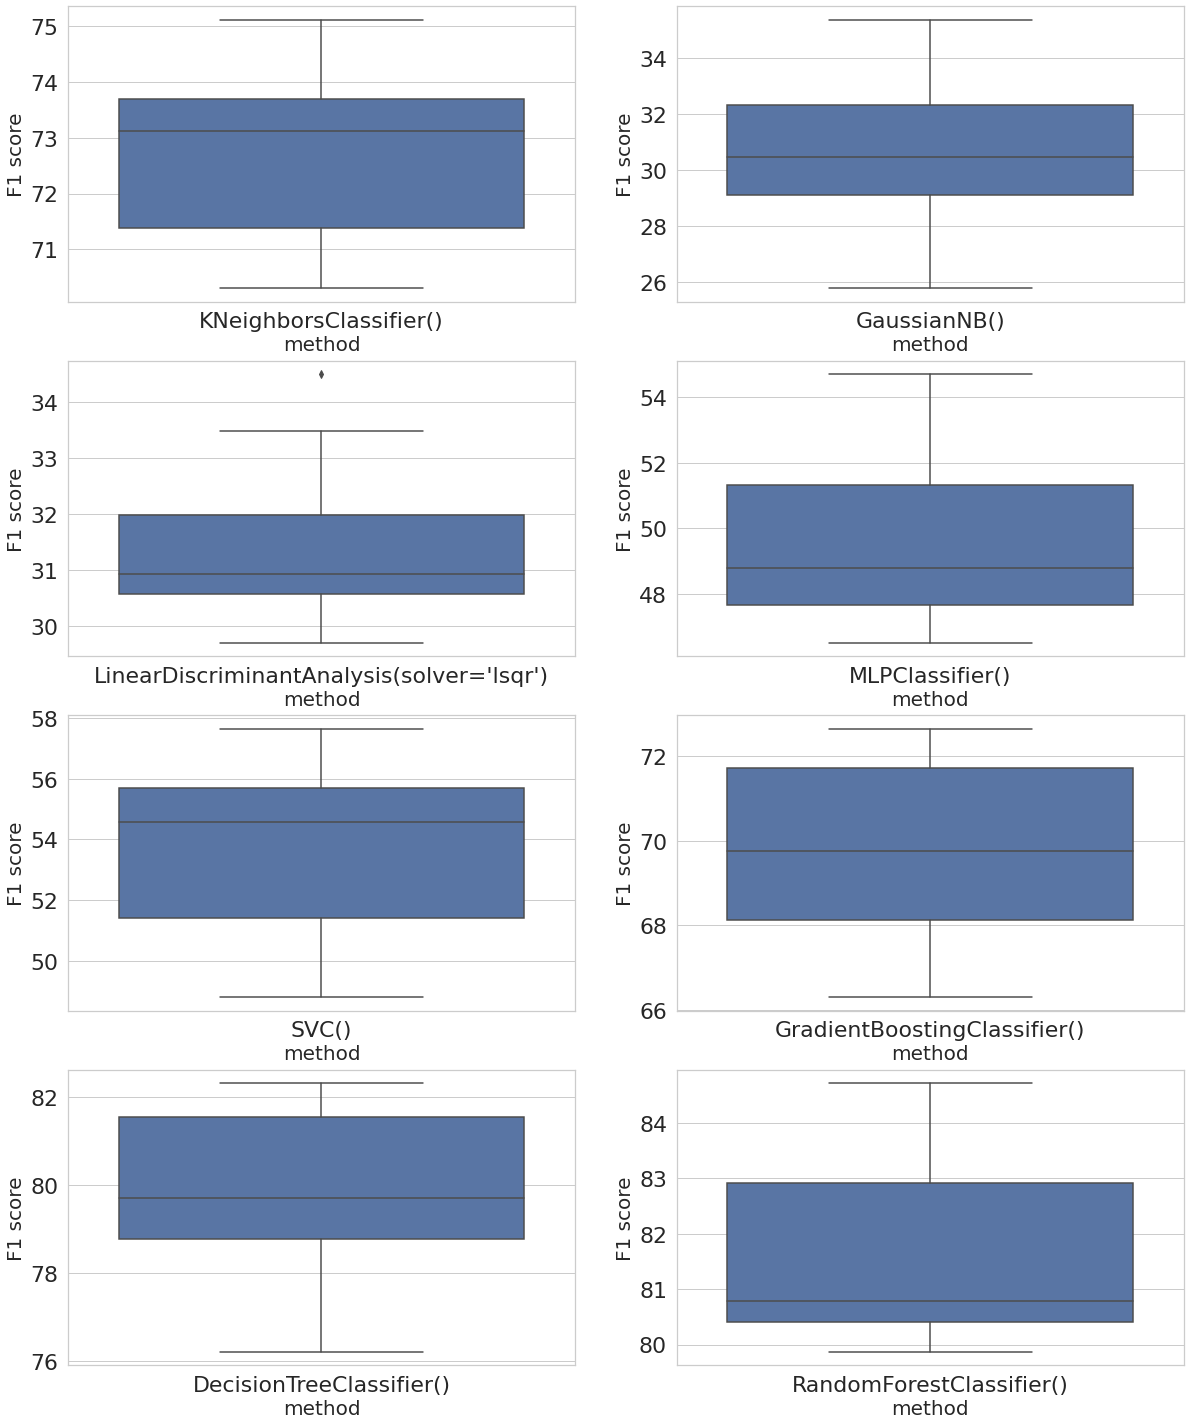

In [200]:
graf(box)

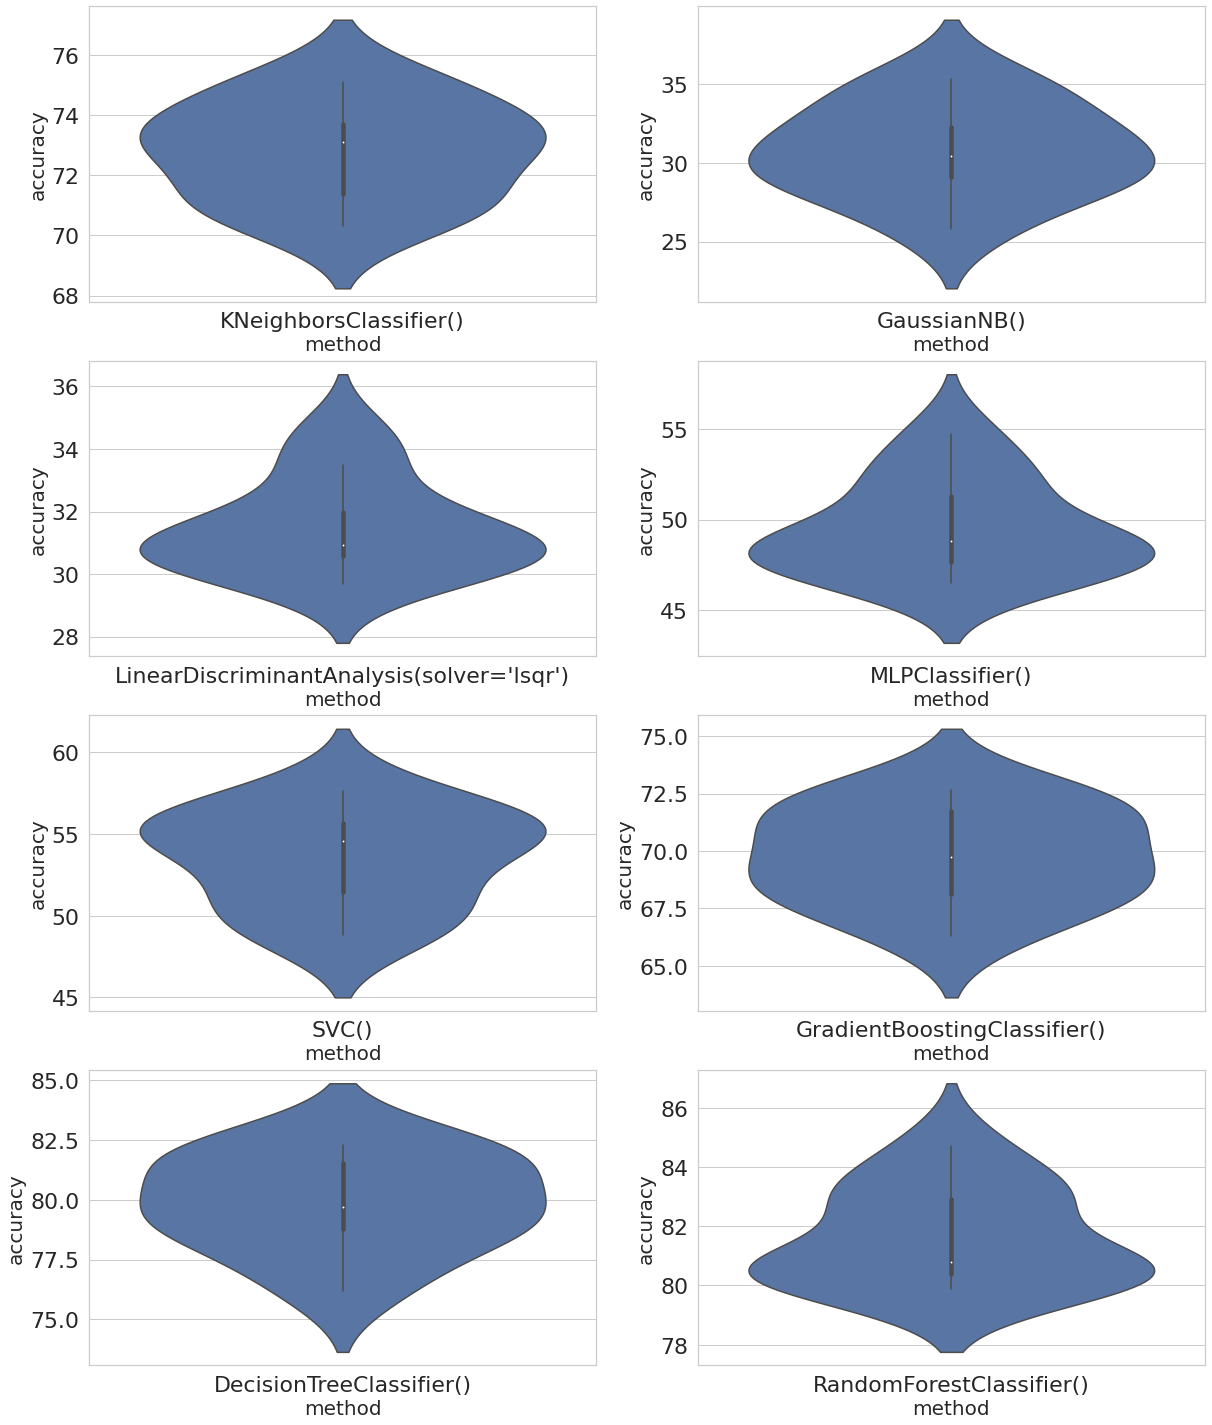

In [201]:
violin(box)

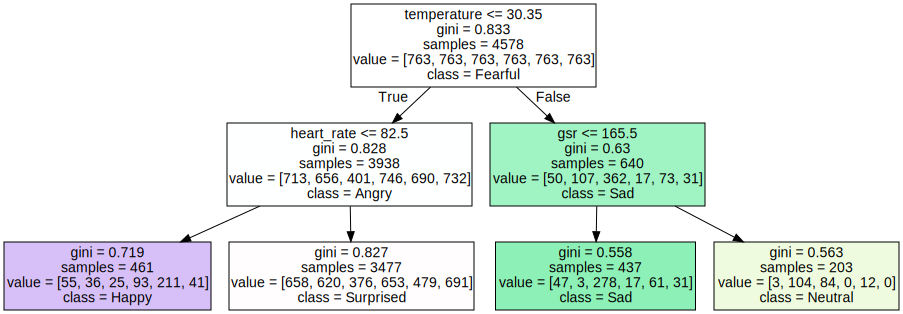

In [202]:
clf = DecisionTreeClassifier(max_depth=2)
model_tree = clf.fit(oldX2, y)
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=['gsr', 'heart_rate', 'temperature'],  
                                class_names=['Fearful', 'Neutral', 'Sad', 'Angry', 'Happy', 'Surprised'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [203]:
graph.render("decision_tree_graphivz")
files.download('decision_tree_graphivz.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [204]:
clf = DecisionTreeClassifier(max_depth=4, random_state=1234)
model = clf.fit(oldX, oldy)
text_representation = tree.export_text(clf, feature_names=['gsr', 'heart_rate', 'temperature', 'median gsr', 'median heart_rate', 'median temp'])

In [205]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [207]:
clf = DecisionTreeClassifier(max_depth=3, random_state=1234)
model = clf.fit(oldX3, oldy)
text_representation = tree.export_text(clf, feature_names=['gsr', 'heart_rate', 'temperature'])
rules = get_rules(clf, ['gsr', 'heart_rate', 'temperature'] , ['Fearful', 'Neutral', 'Sad', 'Angry', 'Happy', 'Surprised'])
for r in rules:
    print(r)

if (temperature <= 30.4) and (temperature <= 28.75) and (temperature <= 28.15) then class: Surprised (proba: 24.87%) | based on 1,797 samples
if (temperature <= 30.4) and (temperature <= 28.75) and (temperature > 28.15) then class: Angry (proba: 30.63%) | based on 1,430 samples
if (temperature <= 30.4) and (temperature > 28.75) and (temperature <= 29.5) then class: Fearful (proba: 79.02%) | based on 367 samples
if (temperature > 30.4) and (gsr <= 149.0) and (gsr > 66.75) then class: Sad (proba: 79.11%) | based on 316 samples
if (temperature <= 30.4) and (temperature > 28.75) and (temperature > 29.5) then class: Happy (proba: 43.37%) | based on 279 samples
if (temperature > 30.4) and (gsr > 149.0) then class: Neutral (proba: 54.14%) | based on 266 samples
if (temperature > 30.4) and (gsr <= 149.0) and (gsr <= 66.75) then class: Sad (proba: 38.21%) | based on 123 samples
